In [17]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set

<function seaborn.rcmod.set(*args, **kwargs)>

In [18]:
#Overview of dataset

In [19]:
traindata= pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')
df=traindata
traindata.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [22]:
#Data cleaning and manipulation

In [25]:
#Now we clean the categorical data. Under 'BMI Category', 'Normal weight' and 'Normal' refer to the same thing. 

In [27]:
#Replace 'Normal Weight' with 'Normal' and 'Obese' with 'Overweight'
traindata['BMI Category']= traindata['BMI Category'].replace({'Normal Weight': 'Normal'})
traindata['BMI Category']= traindata['BMI Category'].replace({'Obese': 'Overweight'})
traindata['BMI Category'].value_counts()

BMI Category
Normal        216
Overweight    158
Name: count, dtype: int64

In [29]:
#For 'Occupation', 'Saleperson' and 'Sales Representative' refer to the same occupation. Hence we merge them.
#Likewise for 'Software Engineer' and 'Engineer'
#The 'Scientist' and 'Manager' occupations are too poorly represented in the dataset to enable significant analysis, thus let's delete the rows related to them from the DataFrame.

In [31]:
# Merging similar Occupations
df["Occupation"] = traindata["Occupation"].replace({'Sales Representative': 'Salesperson'})

df["Occupation"] = traindata["Occupation"].replace({'Software Engineer': 'Engineer'})

In [32]:
# Delete the Rows with Scientist and Manager as Occupation
index_drop = df[df['Occupation'].isin(['Manager', 'Scientist'])].index
df = df.drop(index_drop)

In [35]:
df['Occupation'].value_counts()

Occupation
Nurse          73
Doctor         71
Engineer       67
Lawyer         47
Teacher        40
Accountant     37
Salesperson    34
Name: count, dtype: int64

In [37]:
#Sleep Quality Data Statistics

Mean: 7.338753387533876
Median: 7.0
Mode: 8


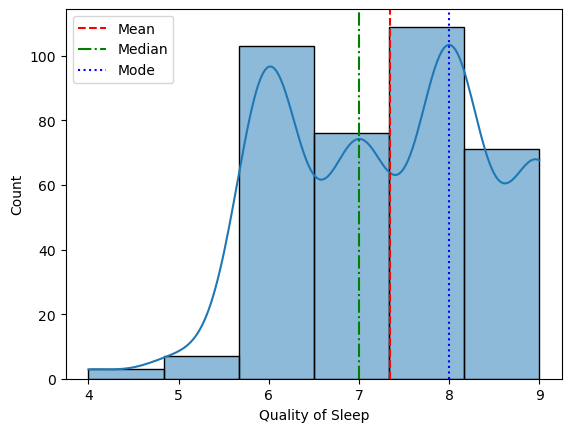

In [39]:
# Mean, Median, Mode, Skewness
mean = df['Quality of Sleep'].mean()
median = df['Quality of Sleep'].median()
mode = df['Quality of Sleep'].mode()[0]

# Print the skewness
print('Mean:', mean)
print('Median:', median)
print('Mode:', mode)


#Create histogram
sb.histplot(x = 'Quality of Sleep', data = df, bins = 6, kde = True)

# Add mean, median, and mode to the graph
plt.axvline(x = mean, color = 'red', linestyle = '--', label = 'Mean')
plt.axvline(x = median, color = 'green', linestyle = '-.', label = 'Median')
plt.axvline(x = mode, color = 'blue', linestyle = ':', label = 'Mode')
plt.legend()
plt.show()


In [41]:
#Findings: Distribution of 'Quality of Sleep' Indicates negative skewness. Also, The distribution has two peaks, indicating a bimodal distribution. 

In [43]:
#Exploratory Analysis of Numeric Variables:

In [45]:
traindata=pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')
vars = ['Sleep Duration','Daily Steps','Age']
pd.DataFrame(traindata[vars])

,Sleep Duration,Daily Steps,Age
0,6.1,4200,27
1,6.2,10000,28
2,6.2,10000,28
3,5.9,3000,28
4,5.9,3000,28
...,...,...,...
369,8.1,7000,59
370,8.0,7000,59
371,8.1,7000,59
372,8.1,7000,59


Sleep Duration : 0 outliers
Daily Steps : 0 outliers
Age : 0 outliers


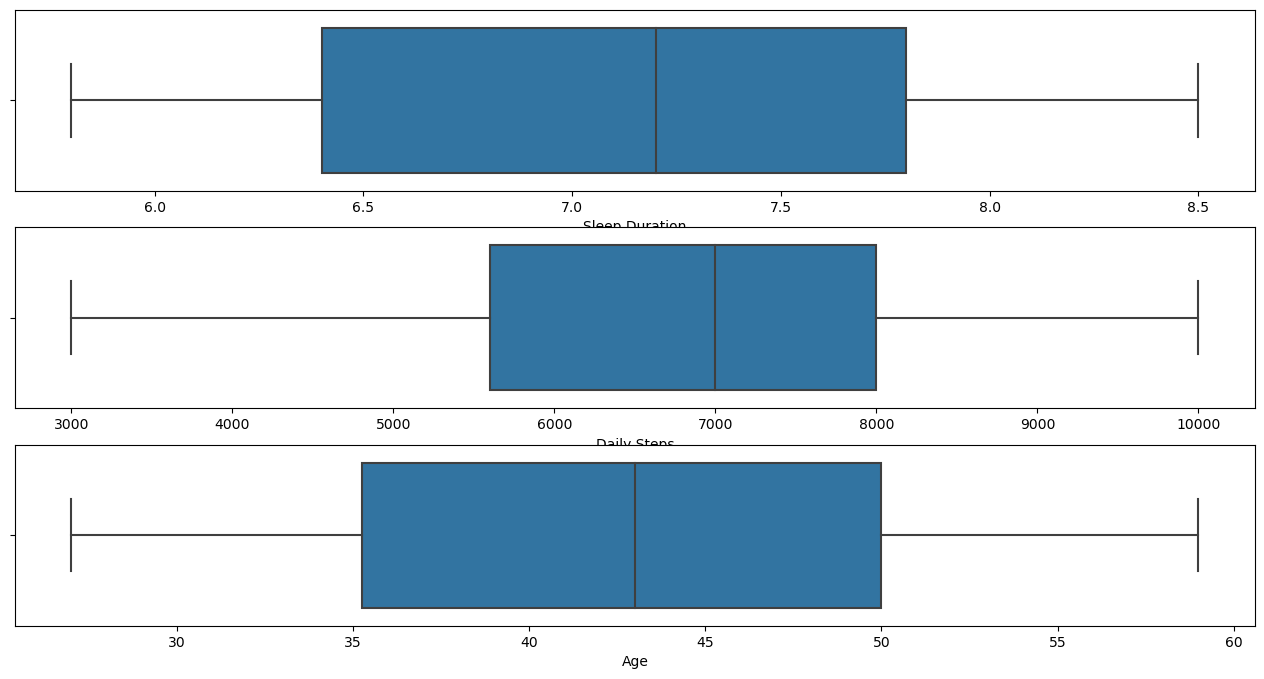

In [47]:
f, axes = plt.subplots(len(vars),1, figsize=(16, 8))
for k, var in enumerate(vars):
    sb.boxplot(x=traindata[var], ax=axes[k], orient="h")
    
    Q1 = traindata[var].quantile(0.25)
    Q3 = traindata[var].quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((traindata[var] < (Q1 - 1.5 * IQR)) | (traindata[var] > (Q3 + 1.5 * IQR)))
    print(var, ":", outliers.sum(), "outliers")

In [49]:
#Findings: there are no outliers in the numeric variables.

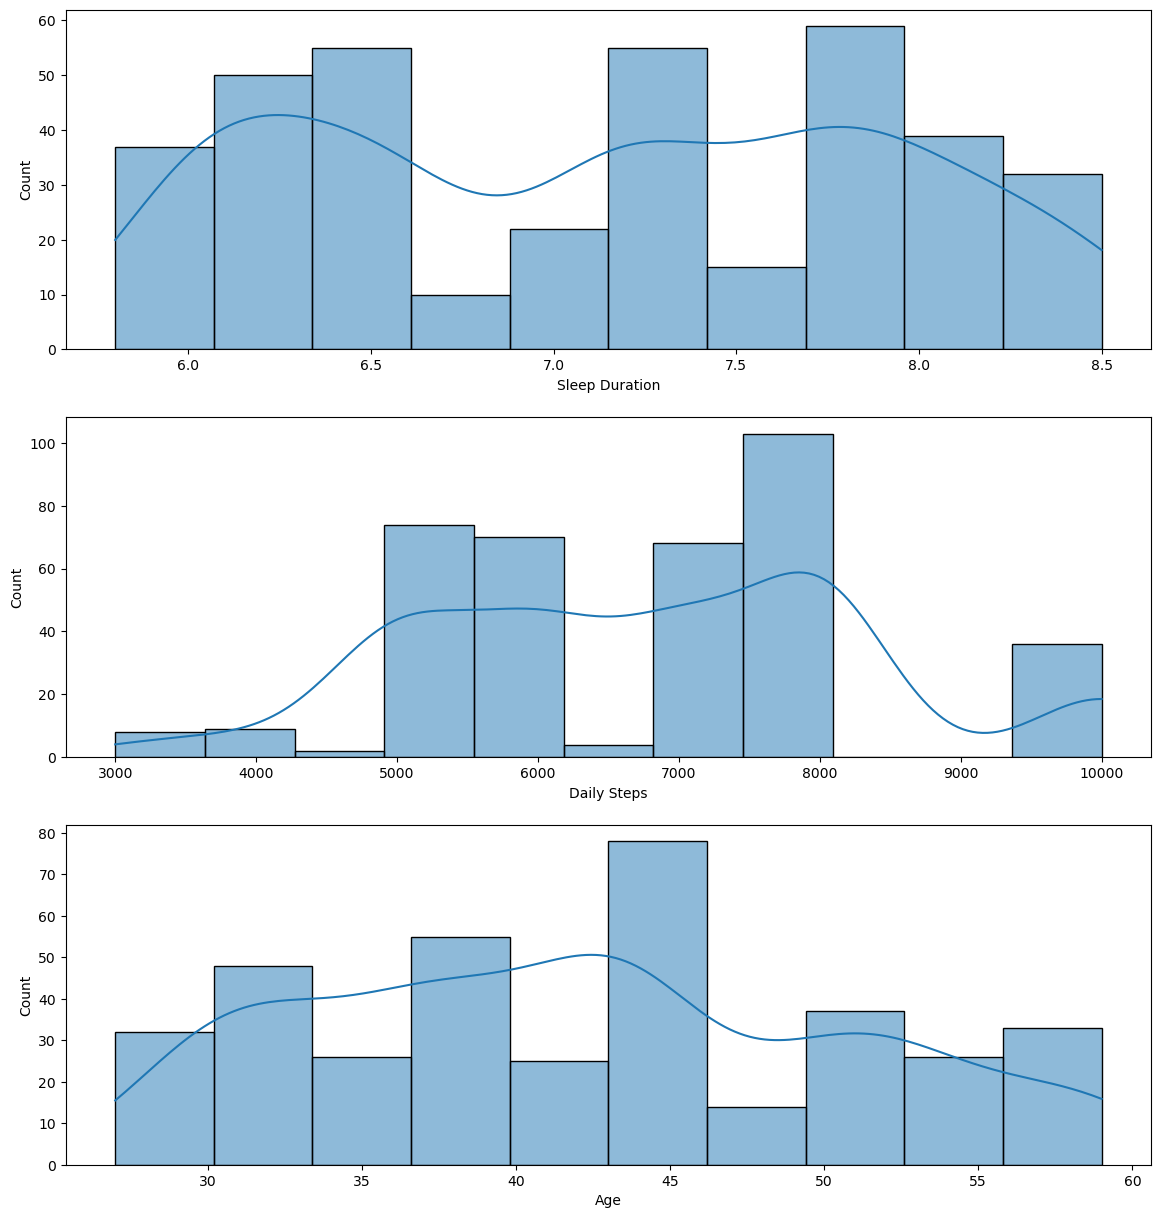

In [51]:
f, axes = plt.subplots(len(vars),1, figsize = (14,15))
for k, var in enumerate(vars):
    sb.histplot(traindata[var], kde = True, ax = axes[k])

In [52]:
for var in vars:
    mean = round(traindata[var].mean(), 2)
    median = traindata[var].median()
    difference = round(mean - median, 2)
    print(var, "\nMean:", mean, "\nMedian:", median, "\nDifference:", difference, "\n")

Sleep Duration 
Mean: 7.13 
Median: 7.2 
Difference: -0.07 

Daily Steps 
Mean: 6816.84 
Median: 7000.0 
Difference: -183.16 

Age 
Mean: 42.18 
Median: 43.0 
Difference: -0.82 



In [53]:
#Findings: 'Daily Steps' is the most skewed from the normal distrubution as the mean and median has the largest difference. Moreover, the negative difference indicates that mean<median thus the skew is negative. 

                  Sleep Duration  Daily Steps       Age  Quality of Sleep
Sleep Duration          1.000000    -0.039533  0.344709          0.883213
Daily Steps            -0.039533     1.000000  0.057973          0.016791
Age                     0.344709     0.057973  1.000000          0.473734
Quality of Sleep        0.883213     0.016791  0.473734          1.000000


<Axes: >

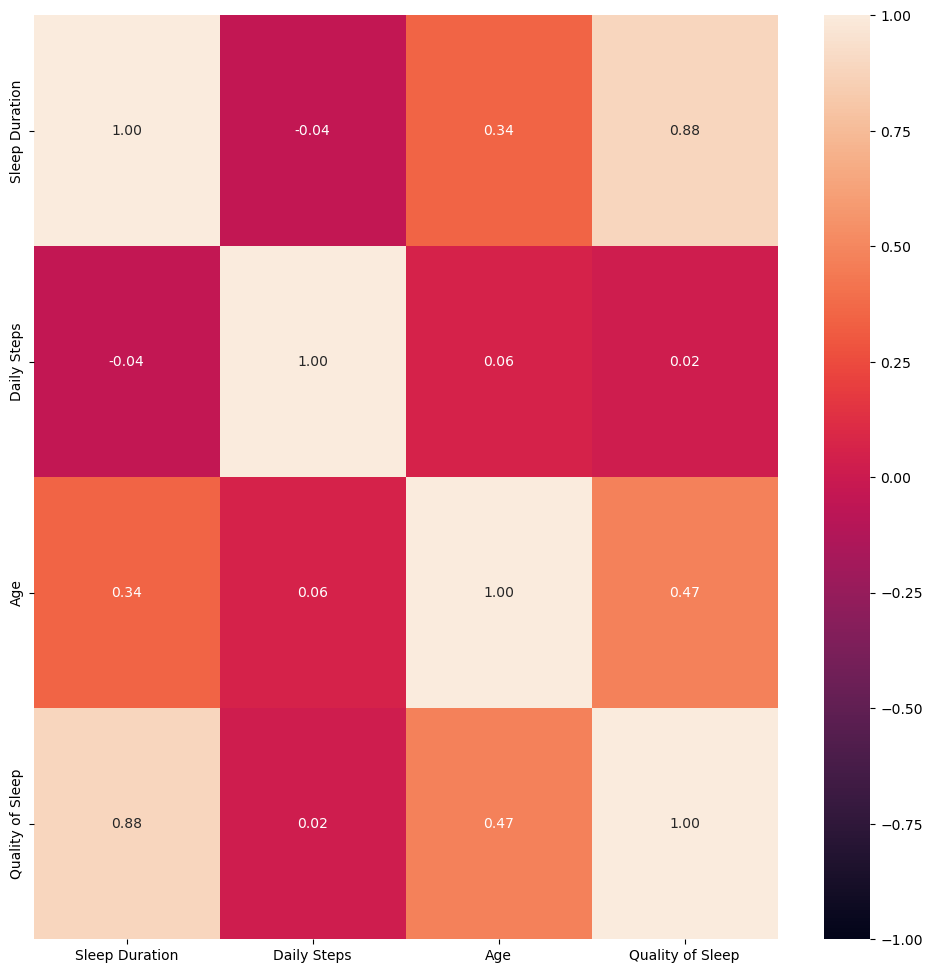

In [57]:
varQual=['Sleep Duration', 'Daily Steps', 'Age', 'Quality of Sleep']
dframe=pd.DataFrame(traindata[varQual])
print(dframe.corr())
f = plt.figure(figsize=(12, 12))
sb.heatmap(dframe.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

In [59]:
#Findings: 'Sleep Duration' and 'Age' has the highest correlation with 'Quality of sleep', 0.88 and 0.47 respectively and will be used in the Linear Regression Model. On the other hand, 'Daily Steps' has almost no correlation, 0.02.

In [61]:
#Exploratory Analysis of Categorical Variables

In [63]:
VarCategorical=['BMI Category', 'Stress Level', 'Occupation']
categorical_Data= pd.DataFrame(traindata[VarCategorical])
categorical_Data['BMI Category'] = categorical_Data['BMI Category'].astype('category')
categorical_Data['Stress Level'] = categorical_Data['Stress Level'].astype('category')
categorical_Data['Occupation'] = categorical_Data['Occupation'].astype('category')

In [65]:
categorical_Data.describe()

,BMI Category,Stress Level,Occupation
count,374,374,374
unique,4,6,11
top,Normal,3,Nurse
freq,195,71,73


<Axes: xlabel='BMI Category', ylabel='Quality of Sleep'>

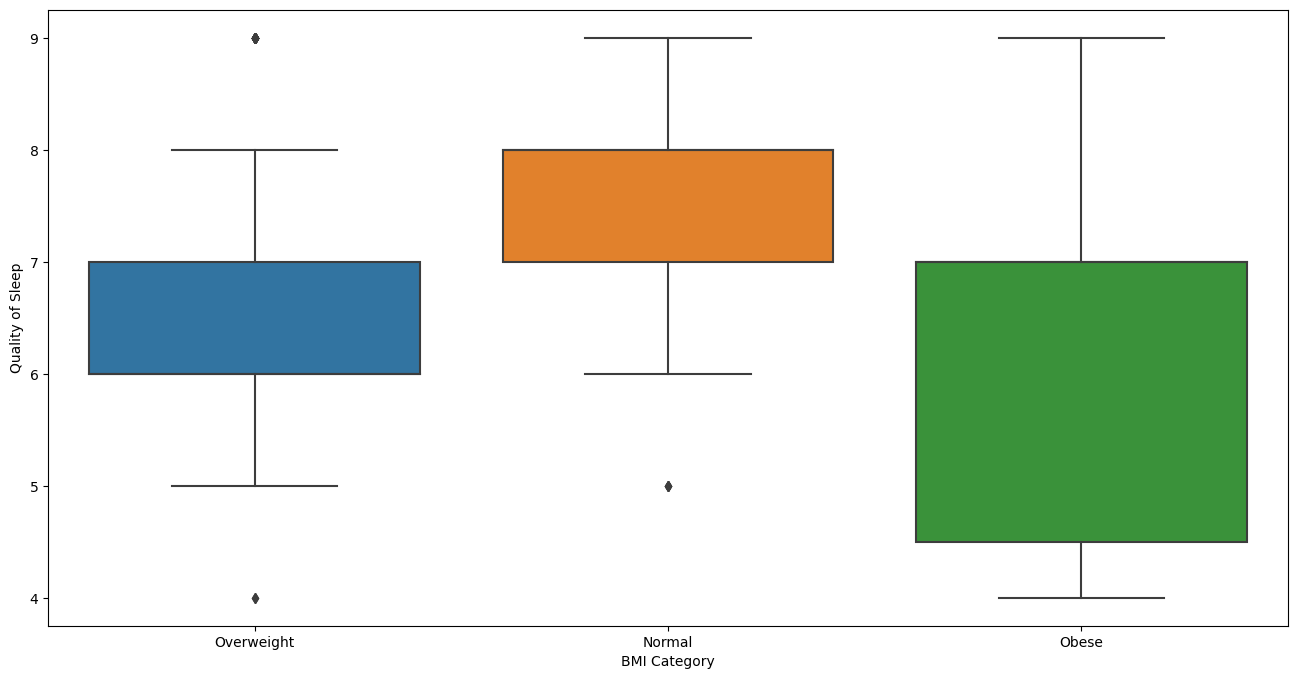

In [67]:
QualSleep= pd.DataFrame(traindata['Quality of Sleep'])
traindata['BMI Category']= traindata['BMI Category'].replace({'Normal Weight': 'Normal'})
CategorySale = pd.concat([traindata[['BMI Category','Stress Level','Occupation']], QualSleep], axis = 1)
f, axes = plt.subplots(1, 1, figsize=(16, 8))
sb.boxplot(x = 'BMI Category', y = 'Quality of Sleep', data = CategorySale)

<Axes: xlabel='Stress Level', ylabel='Quality of Sleep'>

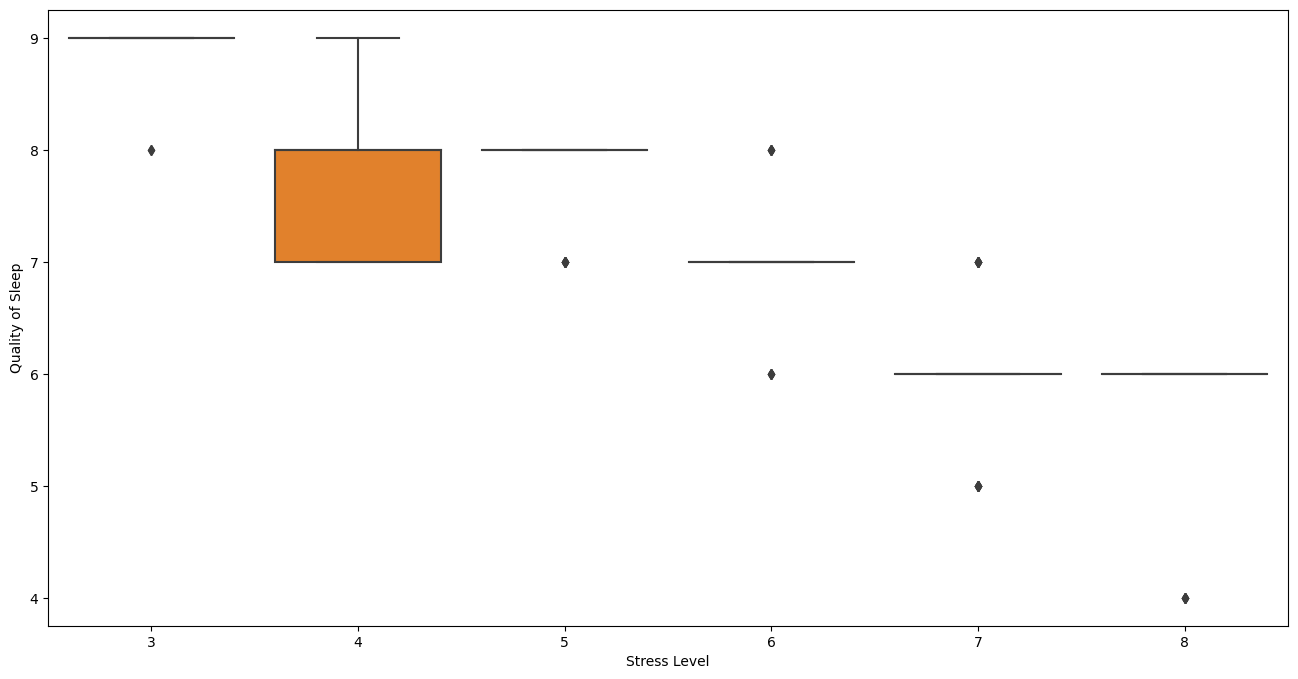

In [69]:
f, axes = plt.subplots(1, 1, figsize=(16, 8))
sb.boxplot(x = 'Stress Level', y = 'Quality of Sleep', data = CategorySale)


<Axes: xlabel='Occupation', ylabel='Quality of Sleep'>

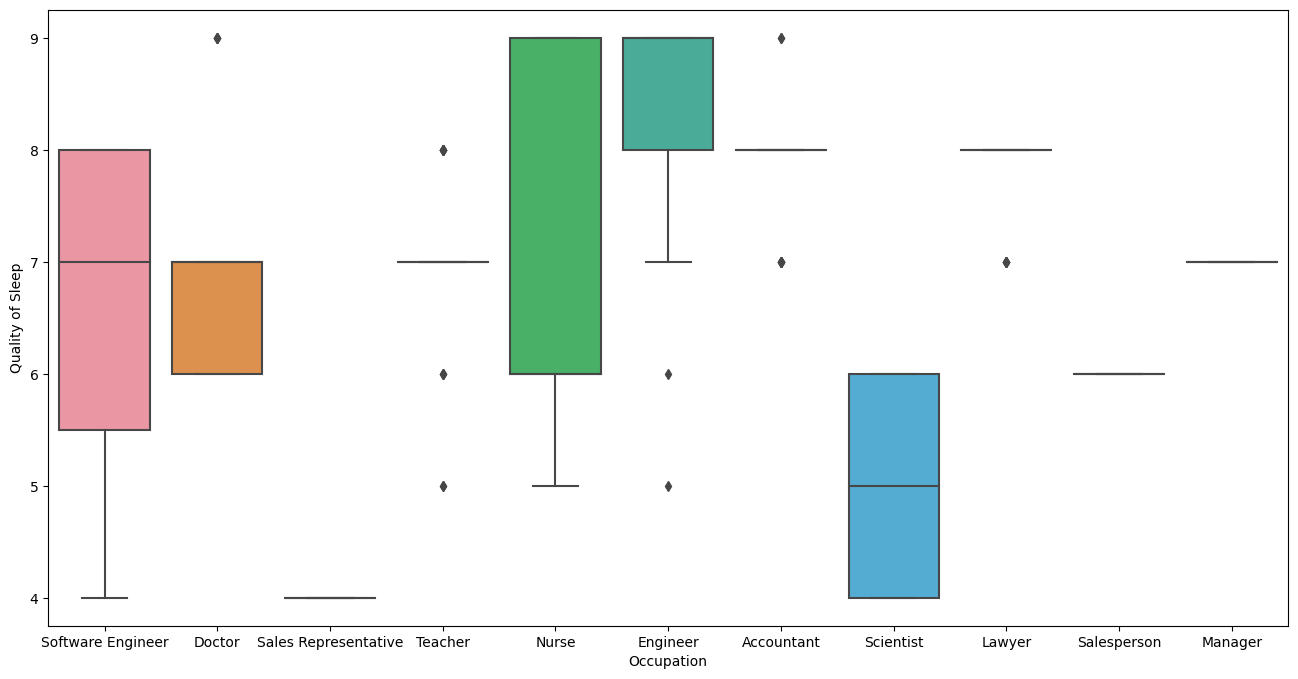

In [71]:
f, axes = plt.subplots(1, 1, figsize=(16, 8))
sb.boxplot(x = 'Occupation', y = 'Quality of Sleep', data = CategorySale)

In [72]:
#It is clear that 'Stress Level and BMI Category' are the 2 variables that will help in predicting 'Quality of Sleep' as they have a higher variation in 'Quality of Sleep' across all levels.